# Flamingo: a Visual Language Model for Few-Shot Learning


---



---
**Authors: Sumin Lee and Qi Zhao**

---

## Overview
This notebook demonstrates a key idea from the paper **"Flamingo: a Visual Language Model for Few-Shot Learning"* by Alayrac et al. The Flamingo model is a visual-language model that excels at few-shot learning by integrating visual information with a pre-trained language model, enabling it to perform a wide variety tasks, including open-ended tasks like captioning or visual question answering with minimal examples.

The first key idea demonstrated here is **the integration of visual features into a language model's input sequence to enable few-shot learning via in-context learning**. Specifically, we:
- Extract image features using a pre-trained convolutional neural network (CNN).
- Transform these varying-size large feature maps to few visual tokens using a **Perceiver Resampler**
- Insert **Gated cross-attention dense blocks** to pre-trained GPT-2 model to condition the LM on visual inputs without changing the LLM weights.

Since this set-up requires a substantial amount of pre-training (perceiver resampler and gated Xattn layers), we demonstrate the use-case of Flamingo by using a


**Citations**:
- [1] [Alayrac, J., Donahue, J., Luc, P., Miech, A., Simonyan, K. (2022) Flamingo: a Visual Language Model for Few-Shot Learning. Advances in neural information processing systems, 35, 23716-23736.](https://proceedings.neurips.cc/paper_files/paper/2022/file/960a172bc7fbf0177ccccbb411a7d800-Paper-Conference.pdf)


## Setup and imports

In [ ]:
!pip install torch torchvision transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

## Installs and imports

In [ ]:
!pip install open_flamingo

INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 82.4 

In [ ]:
!pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.6.0%2Bcu118-cp311-cp311-linux_x86_64.whl.metadata (27 kB)
  Using cached https://download.pytorch.org/whl/cu118/nvidia_cuda_nvrtc_cu11-11.8.89-py3-none-manylinux1_x86_64.whl (23.2 MB)
  Using cached https://download.pytorch.org/whl/cu118/nvidia_cuda_runtime_cu11-11.8.89-py3-none-manylinux1_x86_64.whl (875 kB)
  Using cached https://download.pytorch.org/whl/cu118/nvidia_cuda_cupti_cu11-11.8.87-py3-none-manylinux1_x86_64.whl (13.1 MB)
  Using cached https://download.pytorch.org/whl/cu118/nvidia_cudnn_cu11-9.1.0.70-py3-none-manylinux2014_x86_64.whl (663.9 MB)
  Using cached https://download.pytorch.org/whl/cu118/nvidia_cublas_cu11-11.11.3.6-py3-none-manylinux1_x86_64.whl (417.9 MB)
  Using cached https://download.pytorch.org/whl/cu118/nvidia_curand_cu11-10.3.0.86-py3-none-manylinux1_x86_64.whl (58.1 MB)
  Using cached https://download.pytorch.org/whl/cu118/nvidia_cusolv

In [ ]:
!pip install pycocoevalcap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 5.4 MB/s eta 0:00:00


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.


In [ ]:
import torch
from open_flamingo import create_model_and_transforms
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset
from tqdm import tqdm
from pycocoevalcap.cider.cider import Cider


#### Helper Functions

In [ ]:

def load_flamingo_model():
    model, image_processor, tokenizer = create_model_and_transforms(
        clip_vision_encoder_path="ViT-L-14",
        clip_vision_encoder_pretrained="openai",
        lang_encoder_path="anas-awadalla/mpt-1b-redpajama-200b",
        tokenizer_path="anas-awadalla/mpt-1b-redpajama-200b",
        cross_attn_every_n_layers=1
    )
    model.eval()
    return model, image_processor, tokenizer

def construct_prompt(text_examples):
    prompt = "".join([f"<image>{caption}<|endofchunk|>" for caption in text_examples])+"<image>An image of"
    return prompt

def cider_score(predicted_caption, target_captions):
    cider = Cider()
    hypo = {0: [predicted_caption]}
    refs = {0: target_captions}
    score, _ = cider.compute_score(refs, hypo)
    return score


def visualize_examples(images, targets, generated):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for idx, img in enumerate(images):
        axes[idx].imshow(img)
        axes[idx].axis("off")
    plt.suptitle(f"Generated: {generated}\nTarget: {targets}")
    plt.show()





In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T
from torchvision.models import resnet18
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# For the pretrained language model
from transformers import GPT2LMHeadModel, GPT2Tokenizer


## Visual Feature Integration

### 1. Vision Encoder

In [ ]:
class SimpleVisionEncoder(nn.Module):
    def __init__(self, output_dim=512, pretrained=True):
        super().__init__()
        # Use a small ResNet18
        resnet = resnet18(pretrained=pretrained)
        # Remove the classification head
        self.backbone = nn.Sequential(*list(resnet.children())[:-1])
        # The output dimension of resnet18's penultimate layer is 512
        self.output_dim = output_dim

    def forward(self, x):
        """
        x: [batch_size, 3, H, W]
        return: [batch_size, 512] or [batch_size, 512, H', W']
        """
        # For simplicity, we'll just output the pooled features:
        features = self.backbone(x)  # [B, 512, 1, 1]
        features = features.view(features.size(0), -1)  # [B, 512]
        return features

### 2. Perceiver Resampler

We’ll define a minimal version that:

- Takes in [B, D] features (from the encoder).

- Produces [B, N, O] tokens, where N is the desired number of tokens, and O is a chosen output dimension.

In [ ]:
class PerceiverResampler(nn.Module):
    def __init__(self, input_dim=512, hidden_dim=128, num_tokens=4, output_dim=768):
        super().__init__()
        self.num_tokens = num_tokens
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        self.learned_queries = nn.Parameter(torch.randn(num_tokens, hidden_dim))
        self.input_proj = nn.Linear(input_dim, hidden_dim)
        self.mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
        )
        # Final projection to match LM dimension
        self.final_proj = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        B = x.size(0)
        x_proj = self.input_proj(x)  # [B, hidden_dim]
        queries = self.learned_queries.unsqueeze(0).expand(B, self.num_tokens, self.hidden_dim)
        queries = queries + x_proj.unsqueeze(1)
        queries = self.mlp(queries)  # [B, num_tokens, hidden_dim]

        return self.final_proj(queries)  # [B, num_tokens, output_dim]


### 3. GatedXAttnDense Block

Below is a toy version of the `GatedXAttnDense` block from the pseudocode provided by the original paper. It follows three key steps:

#### 1) Gated Cross Attention:
$$
y \leftarrow y + \tanh(\alpha_{\text{xattn}}) \times \text{Attention}(q=y, kv=x)
$$

#### 2) Gated Feed Forward:
$$
y \leftarrow y + \tanh(\alpha_{\text{dense}}) \times \text{FFW}(y)
$$




In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class GatedXAttnDenseLayer(nn.Module):
    def __init__(self, hidden_dim, frozen_LLM_block):
        """
        frozen_LLM_block: an instance of a GPT-2 transformer block
        (from gpt2_model.transformer.h) to be used in a frozen manner for self-attention and FF.
        """
        super().__init__()
        # Cross-attention projections (trainable)
        self.query_proj = nn.Linear(hidden_dim, hidden_dim)
        self.key_proj   = nn.Linear(hidden_dim, hidden_dim)
        self.value_proj = nn.Linear(hidden_dim, hidden_dim)
        self.out_proj   = nn.Linear(hidden_dim, hidden_dim)

        # Feed-forward for the "dense" part
        self.ffw = nn.Sequential(
            nn.Linear(hidden_dim, 4 * hidden_dim),
            nn.ReLU(),
            nn.Linear(4 * hidden_dim, hidden_dim),
        )

        # Gating parameters (initialized at 0)
        self.alpha_xattn = nn.Parameter(torch.ones(1))
        self.alpha_dense = nn.Parameter(torch.zeros(1))

        # # Use the provided GPT-2 block as the frozen module.
        # self.frozen_block = frozen_LLM_block
        # for p in self.frozen_block.parameters():
        #     p.requires_grad = False

    def forward(self, y, x, mask=None):
        """
        y: [B, seq_len, hidden_dim]   (language features)
        x: [B, num_vtokens, hidden_dim] (visual features)
        mask: optional cross-attention mask, shape [B, seq_len, num_vtokens]
              where 1 indicates a position to mask out.
        """
        # 1) Gated Cross Attention
        Q = self.query_proj(y)  # [B, seq_len, hidden_dim]
        K = self.key_proj(x)    # [B, num_vtokens, hidden_dim]
        V = self.value_proj(x)  # [B, num_vtokens, hidden_dim]


        # Construct attention mask if provided.
        attn_mask = None
        if mask is not None:
            attn_mask = mask * -1e4  # [B, seq_len, num_vtokens]
            attn_mask = attn_mask.unsqueeze(1)  # [B, 1, seq_len, num_vtokens]

        # scaled dot-product attention (single-head for simplicity)
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / (x.size(-1) ** 0.5)
        attn_weights = F.softmax(attn_scores, dim=1)  # [B, seq_len, num_vtokens]

        attended = torch.matmul(attn_weights, V)  # [B, seq_len, hidden_dim]

        # Project back to hidden dim
        attended = self.out_proj(attended)


        y = y + torch.tanh(self.alpha_xattn) * attended

        # 2) Gated Feed Forward (dense)
        ffw_out = self.ffw(y)
        y = y + torch.tanh(self.alpha_dense) * ffw_out

        return y, Q, K, attn_weights


### 4. Flamingo model

#### Inserting GatedXAttention Layers into layers of a pretrained LLM for a toy Flamingo model
$$
y \leftarrow y + \text{GatedXAttnDenseLayer}(q=y, kv=x)
$$
$$
y \leftarrow y + \text{frozen_ffw}(y)
$$


In [ ]:

class FlamingoToyModel(nn.Module):
    def __init__(self, lm_name="gpt2", hidden_dim=768, num_gated_layers=4, frozen_LLM_blocks=None):
        """
        lm_name: Name of the pretrained language model (e.g., "gpt2").
        hidden_dim: Hidden dimension (must match GPT-2 hidden size).
        num_gated_layers: Number of gated layers to insert.
        frozen_LLM_blocks: Optionally, a list of LLM blocks to use for the frozen self-attention and FFN.
                    If None, the first num_gated_layers blocks from the LM will be used.
        """
        super().__init__()
        # Load GPT-2 model from Hugging Face
        self.lm = GPT2LMHeadModel.from_pretrained(lm_name)
        # Freeze all parameters of the base LM
        for p in self.lm.parameters():
            p.requires_grad = False

        # Extract transformer blocks to be used for the gated layers.
        # If not provided, we take the first num_gated_layers from GPT-2's transformer.
        if frozen_LLM_blocks is None:
            frozen_LLM_blocks = list(self.lm.transformer.h[:num_gated_layers])
        assert len(frozen_LLM_blocks) == num_gated_layers, "Number of LLM blocks must match num_gated_layers."

        # Create a list of gated cross-attention dense layers, each receiving a GPT-2 block.
        self.gated_layers = nn.ModuleList([
            GatedXAttnDenseLayer(hidden_dim, frozen_LLM_block=block)
            for block in frozen_LLM_blocks
        ])

        # Keep GPT-2's token and positional embeddings, and the final LM head.
        self.embed_tokens = self.lm.transformer.wte
        self.embed_positions = self.lm.transformer.wpe
        self.final_lm_head = self.lm.lm_head

        self.hidden_dim = hidden_dim

    def forward(self, y, visual_tokens=None, attention_mask=None):
        """
        y: text tokens [B, seq_len]
        visual_tokens: [B, num_vtokens, hidden_dim] visual features.
        attention_mask: optional cross-attention mask, shape [B, seq_len, num_vtokens]
                       where 1 indicates a position to mask out.
        """
        # Interleave the gated cross-attention dense layers.
        if visual_tokens is not None:
            # for idx, layer in enumerate(self.gated_layers):
            #     y = self.lm.transformer.h[idx](y)
            #     y = layer(y, visual_tokens)
            y = self.lm.transformer.h[0](y)
            y, Q, K, attn_weights = self.gated_layers[0](y[0], visual_tokens, attention_mask)
        # Pass through final LM head to get logits
        logits = self.final_lm_head(y)  # [B, T, vocab_size]
        # return y, Q, K, attn_weights
        return logits



## Example

In [ ]:
# Example usage:
# Instantiate the tokenizer.
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
# Create the Flamingo model with 4 gated layers (using the first 4 GPT-2 blocks).
flamingo_model = FlamingoToyModel(lm_name="gpt2", hidden_dim=768, num_gated_layers=1)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

### Image embedding


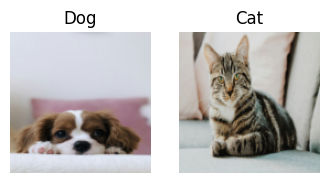

In [ ]:
transform = T.Compose([
    T.Resize((128, 128)),
    T.ToTensor(),
])

def load_image(url):
    resp = requests.get(url)
    img = Image.open(BytesIO(resp.content)).convert("RGB")
    return transform(img).unsqueeze(0)

dog_url = "https://images.unsplash.com/photo-1560807707-8cc77767d783"
cat_url = "https://images.unsplash.com/photo-1518791841217-8f162f1e1131"

dog_img = load_image(dog_url)
cat_img = load_image(cat_url)

plt.figure(figsize=(4,2))
plt.subplot(1,2,1); plt.imshow(dog_img[0].permute(1,2,0)); plt.axis("off"); plt.title("Dog")
plt.subplot(1,2,2); plt.imshow(cat_img[0].permute(1,2,0)); plt.axis("off"); plt.title("Cat")
plt.show()

#### Vision Encodings and Resampler Tokens

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

vision_encoder = SimpleVisionEncoder(output_dim=512).to(device)
resampler = PerceiverResampler(input_dim=512, hidden_dim=128, num_tokens=1).to(device)

dog_img = dog_img.to(device)
cat_img = cat_img.to(device)

with torch.no_grad():
    dog_feats = vision_encoder(dog_img)
    cat_feats = vision_encoder(cat_img)

dog_tokens = resampler(dog_feats)
cat_tokens = resampler(cat_feats)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 66.0MB/s]


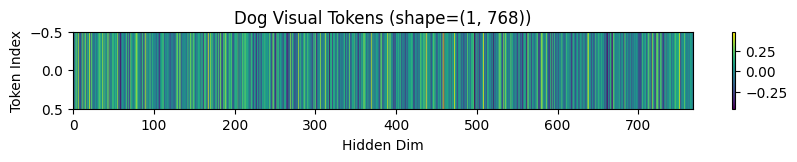

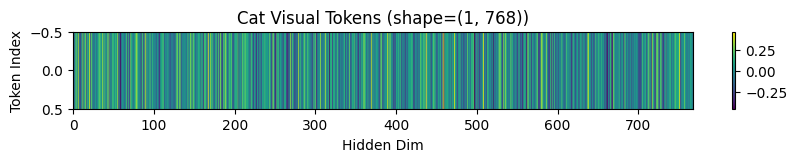

In [ ]:
def visualize_tokens(tokens, title="Visual Tokens"):
    # tokens shape: [1, num_tokens, hidden_dim]
    tokens = tokens.squeeze(0).cpu().detach().numpy()  # [num_tokens, hidden_dim]
    plt.figure(figsize=(10, 1))
    plt.imshow(tokens, aspect='auto', cmap='viridis')
    plt.colorbar()
    plt.title(title + f" (shape={tokens.shape})")
    plt.xlabel("Hidden Dim")
    plt.ylabel("Token Index")
    plt.show()

visualize_tokens(dog_tokens, "Dog Visual Tokens")
visualize_tokens(cat_tokens, "Cat Visual Tokens")


### Text tokenization and Embeddings

In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

text_prompt = "My puppy is sitting on grass. <image> My cat looking very dignified. <image>"
print('Text prompt:', text_prompt)
input_ids = tokenizer.encode(text_prompt, return_tensors='pt').to(device)
print("Tokenized IDs:", input_ids)

# A small embedding layer for demonstration
embed_dim = 768
text_embedding_layer = nn.Embedding(tokenizer.vocab_size, embed_dim).to(device)
with torch.no_grad():
    # random init
    for p in text_embedding_layer.parameters():
        p.copy_(torch.randn_like(p) * 0.01)

text_embeds = text_embedding_layer(input_ids)  # [1, seq_len, embed_dim]
print("Text embeddings shape:", text_embeds.shape)


Text prompt: My puppy is sitting on grass. <image> My cat looking very dignified. <image>
Tokenized IDs: tensor([[ 3666, 26188,   318,  5586,   319,  8701,    13,  1279,  9060,    29,
          2011,  3797,  2045,   845, 13469,  1431,    13,  1279,  9060,    29]])
Text embeddings shape: torch.Size([1, 20, 768])


#### Visualizing Text Embeddings

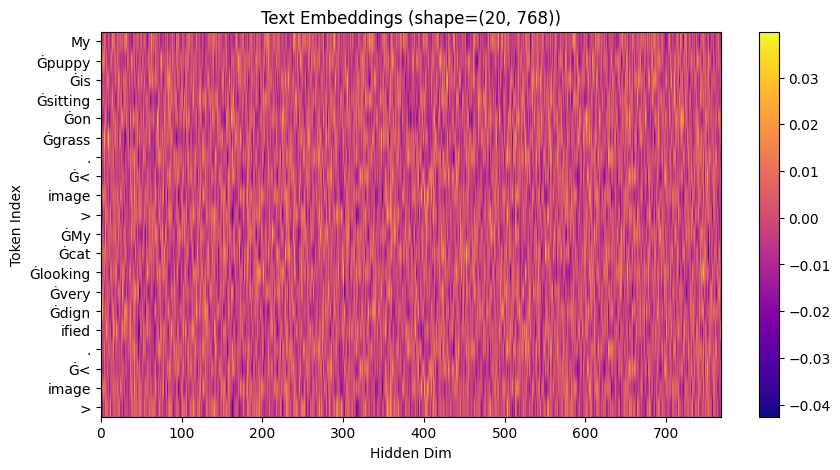

In [ ]:
def visualize_text_embeddings(emb, tokens, title="Text Embeddings"):
    # emb: [1, seq_len, embed_dim]
    emb = emb.squeeze(0).cpu().detach().numpy()
    plt.figure(figsize=(10, 5))
    plt.imshow(emb, aspect='auto', cmap='plasma')
    plt.colorbar()
    plt.title(title + f" (shape={emb.shape})")
    plt.xlabel("Hidden Dim")
    plt.ylabel("Token Index")

    # Show token strings on y-axis
    ytick_labels = [tokens[i] for i in range(len(tokens))]
    plt.yticks(range(len(tokens)), ytick_labels)
    plt.show()

# decode input_ids to text tokens
decoded_tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
visualize_text_embeddings(text_embeds, decoded_tokens, "Text Embeddings")


### Vision Text Cross Embedding

In [ ]:
# Let's find the positions of <image> in the token sequence
image_token_id = tokenizer.encode("<image>")[0]
image_positions = (input_ids[0] == image_token_id).nonzero(as_tuple=True)[0].tolist()
image_positions


[]

In [ ]:
seq_len = input_ids.size(1)
dog_mask = torch.zeros((1, seq_len, dog_tokens.size(1)), device=device)
cat_mask = torch.zeros((1, seq_len, cat_tokens.size(1)), device=device)

if len(image_positions) >= 1:
    # Everything up to the first <image> can attend to dog
    dog_mask[:, image_positions[0]+1:, :] = 1  # block dog cross-attn for tokens AFTER the first <image>
if len(image_positions) >= 2:
    # Everything before the second <image> cannot attend to cat
    cat_mask[:, :image_positions[1], :] = 1    # block cat cross-attn for tokens BEFORE second <image>


In [ ]:

with torch.no_grad():
    # Step 1: attend with dog tokens
    y_dog, Q, K, attn_weights = flamingo_model.gated_layers[0](text_embeds, dog_tokens, mask=dog_mask)
    # y_dog = gated_layer(text_embeds, dog_tokens, mask=dog_mask)
    # visualize_text_embeddings(y_dog, decoded_tokens, title="dog_tokens")


    # Step 2: attend with cat tokens
    y_cat, Q, K, attn_weights = flamingo_model.gated_layers[0](y_dog, cat_tokens, mask=cat_mask)

combined_embeds = y_cat
# print("Combined shape:", combined_embeds.shape)


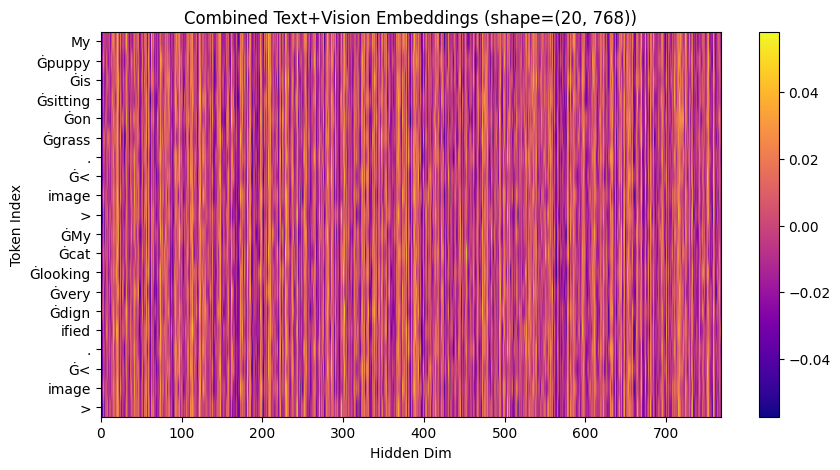

In [ ]:
visualize_text_embeddings(combined_embeds, decoded_tokens, title="Combined Text+Vision Embeddings")


Takeaways: We have demonstrated that the image embeddings get interleaved with the text embeddings through the gated Xattn layer

### Generating task

Please see the other notebooks for the generation task and paper experiment reproduction
